In [122]:
df = pd.read_csv("/content/data_val_log_return.csv",
 index_col=0,
        # name of cols
        header=None,
        names=["index1","index2","index3","index4"])

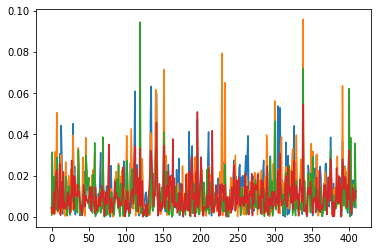

In [124]:
df.index1.plot()
df.index2.plot()
df.index3.plot()
df.index4.plot()

In [2]:
import pandas as pd
spy = pd.read_csv("/content/spy_Close.csv")

In [3]:
import numpy as np
# Adding log-yield :
log_yield = []

for (i, j) in zip(spy.Close, spy.Close[1:]) :
  log_yield.append(np.log(j) - np.log(i))

spy = spy.drop(0)
spy['log_yield'] = log_yield

spy.reset_index(drop = True, inplace = True)

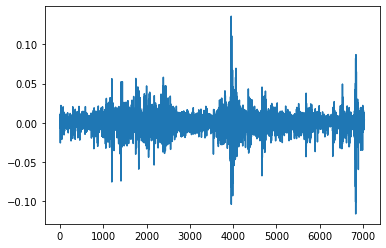

In [4]:
spy.log_yield.plot()

In [6]:
spy["pos_log_yield"] = spy['log_yield'][spy.log_yield >=0]

In [144]:
spy["neg_log_yield"] = spy['log_yield'][spy.log_yield <=0]
spy["neg_log_yield"] = spy['neg_log_yield'][spy.neg_log_yield > -0.101]
spy["neg_log_yield"] = abs(spy["neg_log_yield"])

In [145]:
spy_prod_neg = spy["neg_log_yield"].dropna()

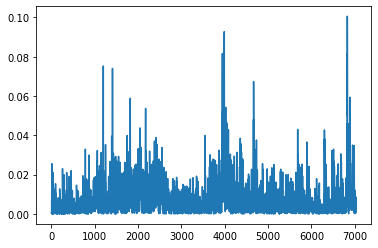

In [146]:
spy_prod_neg.plot()

In [148]:
#Working on the neg
spy_sorted = spy_prod_neg.sort_values()
bins =  np.arange(0, 0.101, 0.001)
ind = np.digitize(spy_prod_neg, bins)
    
"""spy.groupby(ind).head().abs_log_yield.plot()"""

'spy.groupby(ind).head().abs_log_yield.plot()'

In [149]:
bins

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])

In [150]:
N = 10000
serie1 = spy_prod_neg.groupby(ind).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(spy_prod_neg))), replace = True)).sample(frac=1).reset_index(drop=True)
serie2 = spy_prod_neg.groupby(ind).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(spy_prod_neg))), replace = True)).sample(frac=1).reset_index(drop=True)
serie3 = spy_prod_neg.groupby(ind).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(spy_prod_neg))), replace = True)).sample(frac=1).reset_index(drop=True)
serie4 = spy_prod_neg.groupby(ind).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(spy_prod_neg))), replace = True)).sample(frac=1).reset_index(drop=True)

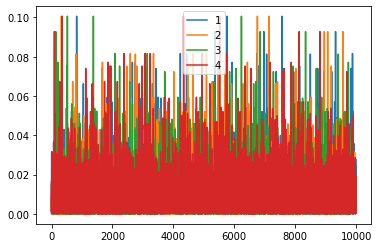

In [151]:
augmented_data = pd.DataFrame()
augmented_data['1'] =  serie1
augmented_data['2'] =  serie2
augmented_data['3'] =  serie3
augmented_data['4'] =  serie4

augmented_data.reset_index(drop=True).plot()

In [164]:
augmented_data.to_csv('augmented_data.csv',index = False,header=False)

In [154]:
sample = augmented_data.sample(frac = 410/10000)

In [161]:
test = sample.reset_index(drop =True)
np.array(test)

array([[0.00401976, 0.00082934, 0.01570203, 0.0071849 ],
       [0.01044225, 0.007729  , 0.00119867, 0.01090891],
       [0.00828917, 0.0061402 , 0.00264376, 0.00033801],
       ...,
       [0.00233031, 0.00267039, 0.0086499 , 0.01895657],
       [0.03285839, 0.00198862, 0.0112877 , 0.01069623],
       [0.02351016, 0.01280785, 0.00631733, 0.00125588]])

In [163]:
Anderson_Darling(np.array(test),np.array(df))

-173.68593870238658